# **Malaria Detection**

## **Executive Summary**

The primary goal is to improve malaria diagnosis by employing a deep learning model that can analyze microscopic images more efficiently and accurately than the traditional microscopic examination, which is often time-consuming and reliant on the skill of the examiner. The need for a reliable, accurate, and replicable diagnostic tool is critical in combating malaria, as early diagnosis and treatment can significantly reduce the risk of severe consequences and death. Integration and adoption of AI-based diagnostic tools, such as deep learning models in computer vision, could satiate that need. The proposed solution is a CNN model with LeakyReLU and Batch Normalization, which helps combat vanishing gradients, making the training process more stable and efficient. After visual examination revealed a prominent role of color, HSV-transformed images were chosen to enhance the model's ability to detect parasites while differentiating them from cell impurities, under a wide range of microscopic lighting conditions. To further improve the solution, it is necessary to regularly update the model with new data and incorporate the latest advancements in deep learning research, develop a standalone web application to make it more accessible to healthcare professionals and provide them with training and support while monitoring the model's performance in real-world settings and updating it as needed. Stakeholders should secure the necessary financial and technical resources and engage with deep learning and healthcare experts to ensure the model aligns with best practices and specific needs in malaria diagnosis and maintain open communication with healthcare professionals and policymakers to promote adoption.


## **Problem and Solution Summary**

Malaria is a life-threatening disease, caused by Plasmodium falciparum, affecting mostly subtropical nations with little health-monitoring infrastructure. Each year, it results in approximately 247 million cases and 619,000 deaths [1]. Traditional microscopic diagnosis requires trained technicians to examine blood smears, but this process is inefficient and dependent on the examiner's skill [2, 3]. Machine learning-based automatic image recognition systems have been developed to classify malaria blood smears, but their practical performance remains insufficient [4]. This project aims to **analyze deep learning algorithms for diagnosing malaria from microscopic images, identifying the best approach to improve reliability, accuracy, and replicability**.

The final proposed solution is a CNN [4] improved with LeakyReLU to combat vanishing gradients and Batch Normalization to reduce the internal covariate shift and make training more stable and efficient, utilizing HSV-transformed images (Appendix 2). HSV transformation was chosen due to its robustness to lighting variations and shadows, as the Hue component remains relatively stable under different microscopic lighting conditions, resulting into a clear color definition of parasites within red blood cells and helping to differentiate them from cell impurities (thus improving false positivity rates) (**Figure 1**). 


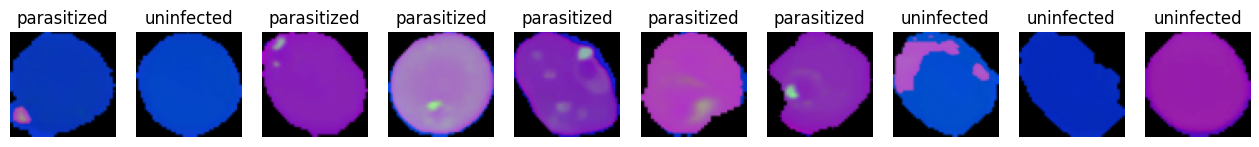

In [ ]:
display_random_images(dataset=train_data_hsv,
                      classes=["uninfected", "parasitized"],
                      n=10,
                      display_shape=False,
                      seed=42)

Figure 1: Sample images from the HSV dataset.

In the context of malaria diagnosis, minimizing false negatives is critical, as unidentified malaria cases can lead to delayed treatment and potentially severe consequences. As a result, recall was selected as the performance metric for evaluating the proposed solution. **Figure 2** shows the best model's performance on the test data, reaching a recall of 98.38% with a very low absolute count of false negatives and ratio of false negatives to false positives. In comparison with the same model applied to an RGB-coded dataset (Appendix 3) and Resnet50 (Appendix 4), a pre-trained model, which can only be trained on RGB images and the training is extremely slow, it reached slightly higher recall and the absolute number of false negatives was halved.

Accuracy: 0.9838
Precision: 0.9839
Recall: 0.9838
F1 Score: 0.9838


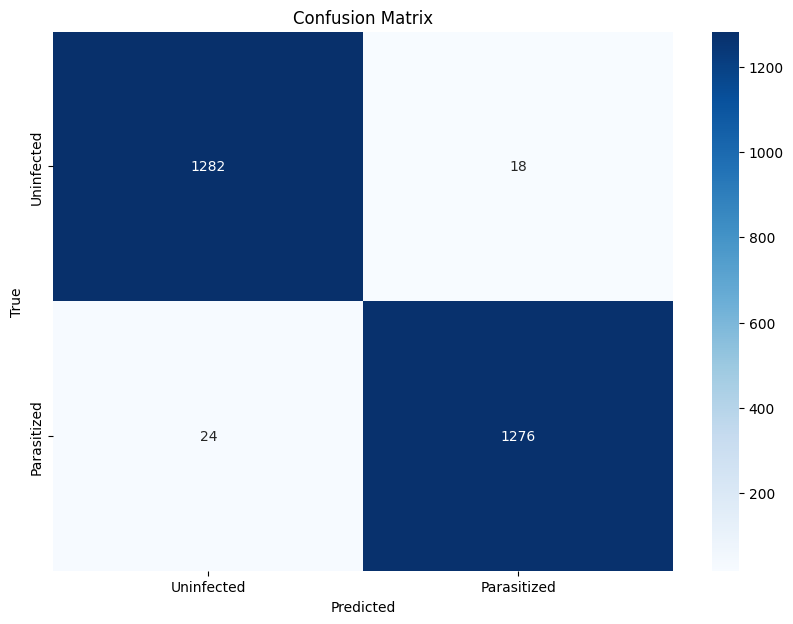

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

model_2.eval()

cm, _ = model_2.evaluate_model(test_dataloader_hsv, device)
class_names = ["Uninfected", "Parasitized"]
model_2.plot_confusion_matrix(cm, class_names)

Figure 2: Performance metrics and confusion matrix on the test dataset for the final proposed solution.

**Figure 3** shows train and validation accuracies during training. The model is converging and generalizing well, with some minor instability.

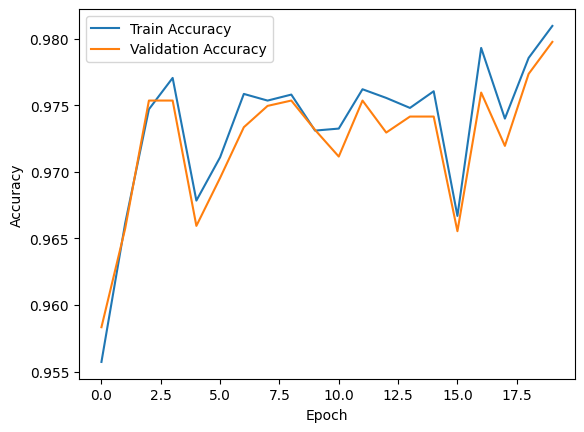

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

model_2.plot_accuracy_curves(train_accuracies, val_accuracies)

Figure 3: Train and validation accuracies during training of the final proposed solution.

## **Recommendations for Implementation**

Summary of key recommendations for the implementation of the proposed solution:
- continuous improvement: regularly updating it with new data and the latest research advancements to optimize performance
- deployment: integrate it with existing healthcare systems or develop a web application
- training and support: for healthcare professionals to interpret the model's outputs correctly
- monitoring and maintenance: maintain its effectiveness

To successfully implement the deep learning model for malaria diagnosis, stakeholders should consider the following key actionables:

- Obtain necessary financial and technical resources. Engage with deep learning and healthcare professionals to ensure the model's design and implementation align with best practices and specific needs of malaria diagnosis.
- Establish partnerships with healthcare organizations or research institutions to acquire high-quality microscopic images for model training and validation. Maintain open communication channels with healthcare professionals, patients, and policymakers, to gather feedback, address concerns, and promote the adoption.
- Evaluate the impact of the model on healthcare outcomes, such as early diagnosis, treatment efficiency, and reduction in malaria-related morbidity and mortality. Collaborate with policymakers to advocate for changes in healthcare policy that support the integration and adoption of AI-based tools.

The current model is cheap to develop, train, and implement, while offering replicability and low number of false negatives. It could cover the intermediate period before any more advanced, accurate and widely available approach is finished, approved and recommended by WHO. The costs associated with implementing a deep learning model for malaria diagnosis [5]:
 - Development (hiring experts and acquiring resources): can range from tens of thousands to hundreds of thousands of dollars 
 - Deployment and integration (software development and network infrastructure): may range from thousands to tens of thousands of dollars  
 - Training and support: could range from a few thousand to tens of thousands of dollars
 - Maintenance and monitoring: can vary from a few thousand to tens of thousands of dollars.

Potential benefits of implementing the deep learning model: improved diagnostic accuracy, faster treatment, reduced workload for healthcare professionals, cost savings for the healthcare system through reduced hospitalization and global health impact [5].

Risks and challenges include:
 - more advanced biological malaria detection techniques are being tested [2, 3] and new computer vision models are well underway in the testing and validation phase for malaria [1] 
 - it is not robust to changes in the development of microscopic precedures or their variation
 - the development of an effective vaccine could entirely displace the need for such a diagnostic model (for example, in August 2022, a secure supply of a new malaria vaccine for children in regions with moderate to high transmission was obtained for 2023 to 2025) [1]
 - social and economic trade-offs of deploying the model for a generally underfunded region with low economic power, although rapid GDP growth has been observed in recent years [6]
 - significant challenges to healthcare investment in sub-Saharan Africa (the need for improved healthcare infrastructure, skilled healthcare workforce, and access to essential medicines and technologies [7]

References are located in Appendix 1.

### **Appendix 1**

[1] World malaria report 2022. Available online: https://www.who.int/teams/global-malaria-programme/reports/world-malaria-report-2022 (accessed on 26 March 2023).<br>
[2] Azikiwe, C.C.; Ifezulike, C.C.; Siminialayi, I.M.; Amazu, L.U.; Enye, J.C.; Nwakwunite, O.E. A comparative laboratory diagnosis of malaria: Microscopy versus rapid diagnostic test kits. *Asian Pac. J. Trop Biomed*. **2021**, 2, 307–310.<br>
[3] Mirahmadi, H.; Rahmati-Balaghaleh, M.; Afzalaghaee, M.; .Zarean, M.; Shamsian, S.A.; Mehravaran, A.; Raissi, V.; Etemadi, S. Detection of malaria using blood smear by light microscopy, RDT and nested-PCR for suspected patients in south-eastern Iran. *Gene Re* **2021**, 25, 101339.<br>
[4] Hemachandran, K.; Alasiry, A.; Marzougui, M.; Ganie, S.M.; Pise, A.A.; Alouane, M.T.-H.; Chola, C. Performance Analysis of Deep Learning Algorithms in Diagnosis of Malaria Disease. *Diagnostics* **2023**, 13, 534.<br>
[5] Topol, E. High-performance medicine: the convergence of human and artificial intelligence. *Nature Medicine*, **2019**, 25(1), 44-56. https://doi.org/10.1038/s41591-018-0300-7
[6] International Monetary Fund. (2021). Regional Economic Outlook: Sub-Saharan Africa. Retrieved from https://www.imf.org/en/Publications/REO/SSA (accessed on 12 April 2023)
[7] World Health Organization Regional Office for Africa. Health financing. Retrieved from https://www.afro.who.int/health-topics/health-financing (accessed on 12 April 2023)
[8] PyTorch. Image transformations. PyTorch Vision. Retrieved from https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py (accessed on 26 March 2023)

### **Appendix 2**

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

# Set the flag to True
torch.backends.cudnn.deterministic = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 2
model_2 = Complex2CNN(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_2.parameters(), lr=0.001)
num_epochs = 20

summary(model_2, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
Complex2CNN                              [32, 2]                   --
├─Conv2d: 1-1                            [32, 18, 66, 66]          504
├─BatchNorm2d: 1-2                       [32, 18, 66, 66]          36
├─LeakyReLU: 1-3                         [32, 18, 66, 66]          --
├─MaxPool2d: 1-4                         [32, 18, 33, 33]          --
├─Dropout2d: 1-5                         [32, 18, 33, 33]          --
├─Conv2d: 1-6                            [32, 72, 31, 31]          11,736
├─BatchNorm2d: 1-7                       [32, 72, 31, 31]          144
├─LeakyReLU: 1-8                         [32, 72, 31, 31]          --
├─MaxPool2d: 1-9                         [32, 72, 15, 15]          --
├─Dropout2d: 1-10                        [32, 72, 15, 15]          --
├─Conv2d: 1-11                           [32, 72, 13, 13]          46,728
├─BatchNorm2d: 1-12                      [32, 72, 13, 13]          144
├─Le

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

with suppress(AssertionError):
  train_accuracies, val_accuracies = model_2.train_model(train_dataloader_hsv, val_dataloader_hsv, criterion, optimizer, device, num_epochs)

Accuracy: 0.9557
Precision: 0.9586
Recall: 0.9557
F1 Score: 0.9557
Accuracy: 0.9583
Precision: 0.9612
Recall: 0.9583
F1 Score: 0.9583
Epoch [1/20] Train Accuracy: 0.9557, Val Accuracy: 0.9583
Accuracy: 0.9661
Precision: 0.9675
Recall: 0.9661
F1 Score: 0.9661
Accuracy: 0.9657
Precision: 0.9673
Recall: 0.9657
F1 Score: 0.9657
Epoch [2/20] Train Accuracy: 0.9661, Val Accuracy: 0.9657
Accuracy: 0.9747
Precision: 0.9752
Recall: 0.9747
F1 Score: 0.9747
Accuracy: 0.9754
Precision: 0.9759
Recall: 0.9754
F1 Score: 0.9754
Epoch [3/20] Train Accuracy: 0.9747, Val Accuracy: 0.9754
Accuracy: 0.9771
Precision: 0.9774
Recall: 0.9771
F1 Score: 0.9771
Accuracy: 0.9754
Precision: 0.9757
Recall: 0.9754
F1 Score: 0.9754
Epoch [4/20] Train Accuracy: 0.9771, Val Accuracy: 0.9754
Accuracy: 0.9678
Precision: 0.9691
Recall: 0.9678
F1 Score: 0.9678
Accuracy: 0.9659
Precision: 0.9675
Recall: 0.9659
F1 Score: 0.9659
Epoch [5/20] Train Accuracy: 0.9678, Val Accuracy: 0.9659
Accuracy: 0.9711
Precision: 0.9719
Recal

### **Apendix 3**

In [ ]:
!pip install torchinfo

import os
import pathlib

import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Tuple, Dict, List

from PIL import Image
import cv2

import torch
from torch.functional import Tensor
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models, datasets
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary

from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, recall_score

import concurrent.futures

from contextlib import suppress
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Visualization methods

# Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    "Displays randomly selected images."

    # Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # Set random seed
    if seed:
        random.seed(seed)

    # Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # Setup plot
    plt.figure(figsize=(16, 8))

    # Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # Plot adjusted samples
        plt.subplot(1, n, i+1)

        if not isinstance(targ_image, Tensor):
          plt.imshow((targ_image * 255).astype(np.uint8))
        else:
          plt.imshow(targ_image.permute(1, 2, 0))
        plt.axis("off")
        if classes:
            title = f"{classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image.shape}"
        plt.title(title)

def imshow(img, ax):
    "Plots transposed images."
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

In [ ]:
# Loading classes and functions

# Write a custom dataset class (inherits from torch.utils.data.Dataset)
# Subclass torch.utils.data.Dataset
class HSVImageDataset(Dataset):
    
    # Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.png"))
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = self.find_classes(targ_dir)
    
    # Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        hsv_image = self.convert_image_to_hsv(img)
        hsv_image = Image.fromarray(hsv_image, 'HSV')
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.png
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(hsv_image), class_idx # return data, label (X, y)
        else:
            return hsv_image, class_idx # return data, label (X, y)

    # Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # Make function to find classes in target directory
    @staticmethod
    def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
        "Finds the class folder names in a target directory."
        # Get the class names by scanning the target directory
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
        
        # Raise an error if class names not found
        if not classes:
            raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
            
        # Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx
    
    @staticmethod
    def convert_image_to_hsv(image):
        "Converts images from RGB to HSV."
        if isinstance(image, torch.Tensor):
            image = image.permute(1, 2, 0).numpy()

        if isinstance(image, Image.Image):
            image = np.array(image)

        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        return hsv_image

In [ ]:
class BaseModel(nn.Module):
    def __init__(self):
        super(BaseModel, self).__init__()

    def forward(self, x):
        raise NotImplementedError

    def train_model(self, train_loader, val_loader, criterion, optimizer, device, num_epochs):
        "Trains the model and stores accuracies for train and validation data loaders for each epoch."
        self.to(device)
        train_accuracies = []
        val_accuracies = []

        for epoch in range(num_epochs):
            self.train()
            running_loss = 0.0

            # Train
            for i, (inputs, labels) in enumerate(train_loader):
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = self(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()


            _, train_accuracy = self.evaluate_model(train_loader, device)
            _, val_accuracy = self.evaluate_model(val_loader, device)

            train_accuracies.append(train_accuracy)
            val_accuracies.append(val_accuracy)

            print(f"Epoch [{epoch + 1}/{num_epochs}] Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}")

        return train_accuracies, val_accuracies

    def evaluate_model(self, test_loader, device):
        "Evaluates the model with basic performance metrics and confusion matrix."
        self.eval()
        self.to(device)
        all_labels = []
        all_predicted = []

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = self(inputs)
                _, predicted = torch.max(outputs.data, 1)
                all_labels.extend(labels.cpu().numpy())
                all_predicted.extend(predicted.cpu().numpy())

        accuracy = (np.array(all_labels) == np.array(all_predicted)).mean()
        precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, all_predicted, average='weighted')
        cm = confusion_matrix(all_labels, all_predicted)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1_score:.4f}")

        return cm, accuracy

    def plot_accuracy_curves(self, train_accuracies, val_accuracies):
        "Plots accuracy curves."
        plt.figure()
        plt.plot(train_accuracies, label='Train Accuracy')
        plt.plot(val_accuracies, label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

    def plot_confusion_matrix(self, cm, class_names):
        "Plots confusion matrices."
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")
        plt.show()

In [ ]:
class Complex2CNN(BaseModel):
    def __init__(self, num_classes):
        super(Complex2CNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=18, kernel_size=3, stride=1, padding=2)
        self.bn1 = nn.BatchNorm2d(18)
        self.leakyrelu1 = nn.LeakyReLU(inplace=True)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout2d(p=0.25)

        self.conv2 = nn.Conv2d(in_channels=18, out_channels=72, kernel_size=3, stride=1)
        self.bn2 = nn.BatchNorm2d(72)
        self.leakyrelu2 = nn.LeakyReLU(inplace=True)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout2d(p=0.25)

        self.conv3 = nn.Conv2d(in_channels=72, out_channels=72, kernel_size=3, stride=1)
        self.bn3 = nn.BatchNorm2d(72)
        self.leakyrelu3 = nn.LeakyReLU(inplace=True)
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout3 = nn.Dropout2d(p=0.25)

        self.conv4 = nn.Conv2d(in_channels=72, out_channels=72, kernel_size=3, stride=1)
        self.bn4 = nn.BatchNorm2d(72)
        self.leakyrelu4 = nn.LeakyReLU(inplace=True)
        self.maxpool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout4 = nn.Dropout2d(p=0.25)

        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(in_features=288, out_features=72)
        self.bn5 = nn.BatchNorm1d(72)
        self.leakyrelu5 = nn.LeakyReLU(inplace=True)
        self.dropout5 = nn.Dropout(p=0.5)

        self.fc2 = nn.Linear(in_features=72, out_features=num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.leakyrelu1(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.leakyrelu2(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = self.leakyrelu3(x)
        x = self.maxpool3(x)
        x = self.dropout3(x)

        x = self.conv4(x)
        x = self.bn4(x)
        x = self.leakyrelu4(x)
        x = self.maxpool4(x)
        x = self.dropout4(x)

        x = self.flatten(x)

        x = self.fc1(x)
        x = self.bn5(x)
        x = self.leakyrelu5(x)
        x = self.dropout5(x)

        x = self.fc2(x)
        x = self.softmax(x)

        return x

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

# Paths to folders
data_dir = "/content/drive/MyDrive/cell_images/"

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

transforms_custom = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

full_train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transforms_custom)

# Split the dataset into train and validation sets
val_size = int(0.2 * len(full_train_dataset)) # 20% for validation
train_size = len(full_train_dataset) - val_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Apply the validation transforms to the validation dataset
val_dataset.dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), transforms_custom)

test_dataset = datasets.ImageFolder(os.path.join(data_dir, "test"), transforms_custom)

# Create a data loader
train_dataloader_custom = DataLoader(dataset=train_dataset, 
                                     batch_size=BATCH_SIZE, 
                                     num_workers=NUM_WORKERS, 
                                     shuffle=True)

val_dataloader_custom = DataLoader(val_dataset, 
                                batch_size=BATCH_SIZE, 
                                num_workers=NUM_WORKERS,
                                shuffle=False)

test_dataloader_custom = DataLoader(test_dataset, 
                                    batch_size=BATCH_SIZE, 
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

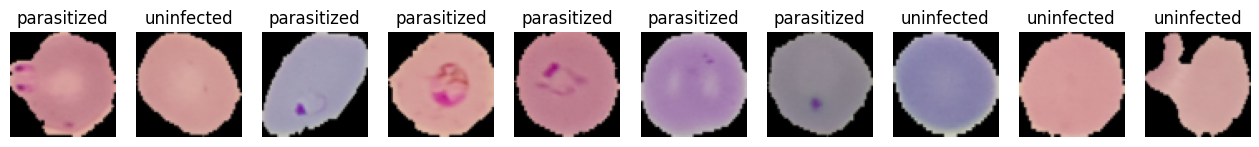

In [ ]:
display_random_images(dataset=train_dataset,
                      classes=["uninfected", "parasitized"],
                      n=10,
                      display_shape=False,
                      seed=42)

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

# Set the flag to True
torch.backends.cudnn.deterministic = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = 2
model_1 = Complex2CNN(num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.001)
num_epochs = 20

summary(model_1, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
Complex2CNN                              [32, 2]                   --
├─Conv2d: 1-1                            [32, 18, 66, 66]          504
├─BatchNorm2d: 1-2                       [32, 18, 66, 66]          36
├─LeakyReLU: 1-3                         [32, 18, 66, 66]          --
├─MaxPool2d: 1-4                         [32, 18, 33, 33]          --
├─Dropout2d: 1-5                         [32, 18, 33, 33]          --
├─Conv2d: 1-6                            [32, 72, 31, 31]          11,736
├─BatchNorm2d: 1-7                       [32, 72, 31, 31]          144
├─LeakyReLU: 1-8                         [32, 72, 31, 31]          --
├─MaxPool2d: 1-9                         [32, 72, 15, 15]          --
├─Dropout2d: 1-10                        [32, 72, 15, 15]          --
├─Conv2d: 1-11                           [32, 72, 13, 13]          46,728
├─BatchNorm2d: 1-12                      [32, 72, 13, 13]          144
├─Le

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

with suppress(AssertionError):
  train_accuracies, val_accuracies = model_1.train_model(train_dataloader_custom, val_dataloader_custom, criterion, optimizer, device, num_epochs)

Accuracy: 0.9543
Precision: 0.9576
Recall: 0.9543
F1 Score: 0.9543
Accuracy: 0.9535
Precision: 0.9569
Recall: 0.9535
F1 Score: 0.9534
Epoch [1/20] Train Accuracy: 0.9543, Val Accuracy: 0.9535
Accuracy: 0.9669
Precision: 0.9685
Recall: 0.9669
F1 Score: 0.9669
Accuracy: 0.9609
Precision: 0.9628
Recall: 0.9609
F1 Score: 0.9609
Epoch [2/20] Train Accuracy: 0.9669, Val Accuracy: 0.9609
Accuracy: 0.9751
Precision: 0.9756
Recall: 0.9751
F1 Score: 0.9751
Accuracy: 0.9703
Precision: 0.9712
Recall: 0.9703
F1 Score: 0.9703
Epoch [3/20] Train Accuracy: 0.9751, Val Accuracy: 0.9703
Accuracy: 0.9798
Precision: 0.9798
Recall: 0.9798
F1 Score: 0.9798
Accuracy: 0.9764
Precision: 0.9764
Recall: 0.9764
F1 Score: 0.9764
Epoch [4/20] Train Accuracy: 0.9798, Val Accuracy: 0.9764
Accuracy: 0.9774
Precision: 0.9777
Recall: 0.9774
F1 Score: 0.9774
Accuracy: 0.9715
Precision: 0.9721
Recall: 0.9715
F1 Score: 0.9715
Epoch [5/20] Train Accuracy: 0.9774, Val Accuracy: 0.9715
Accuracy: 0.9718
Precision: 0.9728
Recal

Accuracy: 0.9750
Precision: 0.9756
Recall: 0.9750
F1 Score: 0.9750


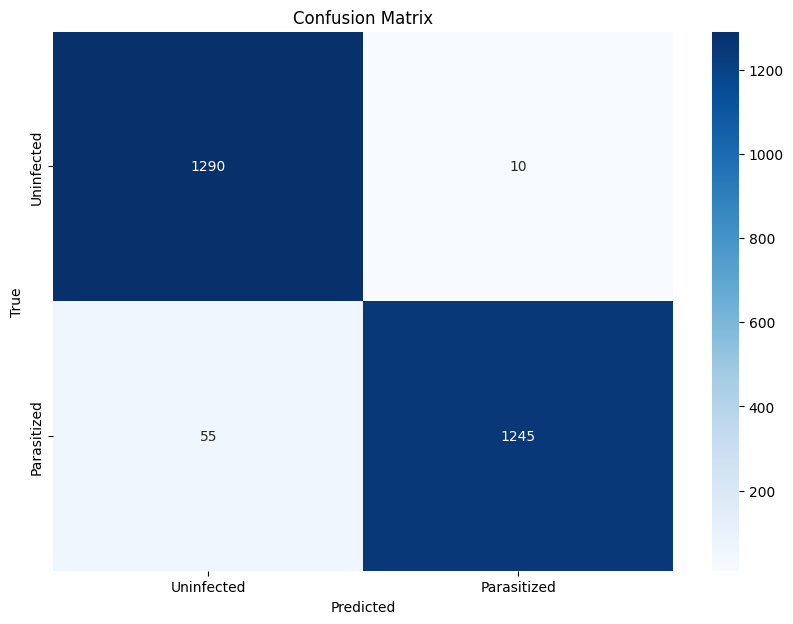

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

model_1.eval()

cm, _ = model_1.evaluate_model(test_dataloader_custom, device)
class_names = ["Uninfected", "Parasitized"]
model_1.plot_confusion_matrix(cm, class_names)

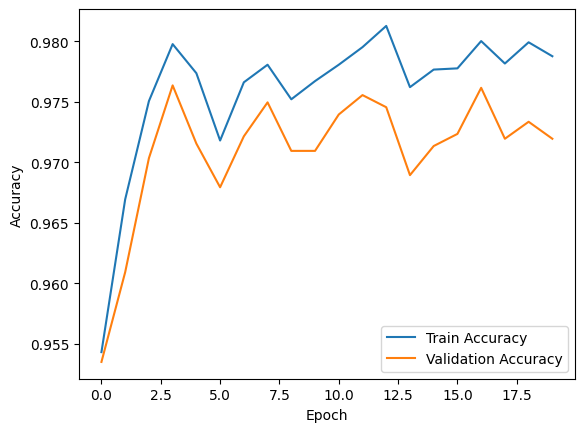

In [ ]:
# Set the seed to a fixed value
torch.manual_seed(42)

model_1.plot_accuracy_curves(train_accuracies, val_accuracies)

### **Appendix 4**

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        # Add your desired data augmentation transforms here
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = "/content/drive/MyDrive/cell_images/"
full_train_dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), data_transforms["train"])

# Split the dataset into train and validation sets
val_size = int(0.2 * len(full_train_dataset)) # 20% for validation
train_size = len(full_train_dataset) - val_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

# Apply the validation transforms to the validation dataset
val_dataset.dataset = datasets.ImageFolder(os.path.join(data_dir, "train"), data_transforms["val"])

image_datasets = {
    "train": train_dataset,
    "val": val_dataset
}

dataloaders = {
    "train": DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4),
    "val": DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)
}

In [36]:
model_3 = models.resnet50(pretrained=True)
num_classes = 2  # Set this value to the number of classes in your dataset
model_3.fc = nn.Linear(model_3.fc.in_features, num_classes)

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_3.parameters(), lr=0.01, momentum=0.9)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_3.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [38]:
num_epochs = 40
train_acc_history = []
val_acc_history = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch}/{num_epochs - 1}")

    for phase in ["train", "val"]:
        if phase == "train":
            model_3.train()
        else:
            model_3.eval()

        running_loss = 0.0
        running_corrects = 0
        epoch_preds = []
        epoch_labels = []

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == "train"):
                outputs = model_3(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == "train":
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

            epoch_preds.extend(preds.detach().cpu().numpy())
            epoch_labels.extend(labels.detach().cpu().numpy())

        epoch_loss = running_loss / len(image_datasets[phase])
        epoch_acc = running_corrects.double() / len(image_datasets[phase])

        print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

        if phase == "train":
            train_acc_history.append(epoch_acc)
        else:
            val_acc_history.append(epoch_acc)

        # Compute recall score for the validation phase
        if phase == "val":
            recall = recall_score(epoch_labels, epoch_preds, average="macro")
            print(f"{phase} Recall: {recall:.4f}")

    print("-" * 10)

print("Training complete")

Epoch 0/39
train Loss: 0.1236 Acc: 0.9495
val Loss: 0.0899 Acc: 0.9675
val Recall: 0.9675
----------
Epoch 1/39
train Loss: 0.0684 Acc: 0.9754
val Loss: 0.0881 Acc: 0.9695
val Recall: 0.9695
----------
Epoch 2/39
train Loss: 0.0590 Acc: 0.9797
val Loss: 0.0904 Acc: 0.9699
val Recall: 0.9699
----------
Epoch 3/39
train Loss: 0.0539 Acc: 0.9813
val Loss: 0.0947 Acc: 0.9659
val Recall: 0.9659
----------
Epoch 4/39
train Loss: 0.0442 Acc: 0.9843
val Loss: 0.0974 Acc: 0.9673
val Recall: 0.9673
----------
Epoch 5/39
train Loss: 0.0398 Acc: 0.9858
val Loss: 0.0966 Acc: 0.9669
val Recall: 0.9669
----------
Epoch 6/39
train Loss: 0.0329 Acc: 0.9875
val Loss: 0.1113 Acc: 0.9691
val Recall: 0.9691
----------
Epoch 7/39
train Loss: 0.0324 Acc: 0.9876
val Loss: 0.1183 Acc: 0.9685
val Recall: 0.9685
----------
Epoch 8/39
train Loss: 0.0307 Acc: 0.9901
val Loss: 0.1234 Acc: 0.9693
val Recall: 0.9693
----------
Epoch 9/39
train Loss: 0.0235 Acc: 0.9920
val Loss: 0.1274 Acc: 0.9685
val Recall: 0.9686
-

In [42]:
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_data = datasets.ImageFolder(os.path.join(data_dir, 'test'), test_transforms)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=4)

In [43]:
def evaluate(model, dataloader, device):
    model.eval()
    epoch_preds = []
    epoch_labels = []

    for inputs, labels in dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        epoch_preds.extend(preds.detach().cpu().numpy())
        epoch_labels.extend(labels.detach().cpu().numpy())

    recall = recall_score(epoch_labels, epoch_preds, average='macro')
    cm = confusion_matrix(epoch_labels, epoch_preds)
    return recall, cm

In [44]:
test_recall, test_cm = evaluate(model_3, test_loader, device)
print(f'Test recall: {test_recall:.4f}')

Test recall: 0.9750


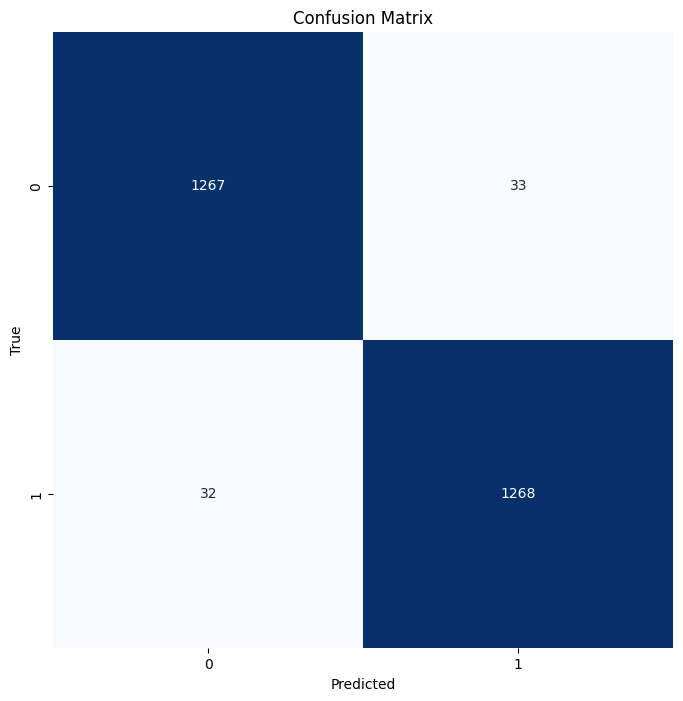

In [45]:
plt.figure(figsize=(8, 8))
sns.heatmap(test_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()